<a href="https://colab.research.google.com/github/Sajidcodecrack/Rainfall-Prediction/blob/main/Last_Rainfall_Prediction2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from Google Drive (ensure it's uploaded to your drive first)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Replace the path with the correct location of your file
df = pd.read_csv('/content/drive/MyDrive/Temp_and_rain.csv')

# Categorize 'rain' into Low, Medium, and Heavy rainfall
def categorize_rain(rainfall):
    if rainfall < 100:
        return 0  # Low Rainfall
    elif 100 <= rainfall <= 200:
        return 1  # Medium Rainfall
    else:
        return 2  # Heavy Rainfall

df['rain_category'] = df['rain'].apply(categorize_rain)

# Print the first few rows to verify
print(df.head(10))

       tem  Month  Year      rain  rain_category
0  16.9760      1  1901   18.5356              0
1  19.9026      2  1901   16.2548              0
2  24.3158      3  1901   70.7981              0
3  28.1834      4  1901   66.1616              0
4  27.8892      5  1901  267.2150              2
5  28.8925      6  1901  341.0420              2
6  28.3327      7  1901  540.9070              2
7  27.9243      8  1901  493.2100              2
8  27.6057      9  1901  291.5490              2
9  27.0887     10  1901  199.1710              1


In [ ]:
# Separate features (X) and target (y)
X = df[['tem', 'Month', 'Year']]
y = df['rain_category']  # Use the categorized target

# Encode the target variable for classification
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (966, 3)
X_test shape: (414, 3)
y_train shape: (966,)
y_test shape: (414,)


In [ ]:
# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print a preview of the scaled features
print("Scaled X_train (first 5 rows):")
print(X_train[:5])


Scaled X_train (first 5 rows):
[[ 0.3918377   1.02681537 -0.8257891 ]
 [-0.17147721 -1.00339677 -1.29896313]
 [ 0.24522074  1.02681537 -1.06237612]
 [ 0.82276476  0.73678506 -1.03280274]
 [ 0.89135287 -0.71336647 -0.79621572]]


In [ ]:
# Build the sequential model
model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))  # Input layer (3 features)
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))             # Hidden layer
model.add(Dense(3, activation='softmax'))            # Output layer (3 classes: Low, Medium, Heavy)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 979 (3.82 KB)

 Trainable params: 979 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=24, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Save the trained model
model.save("/content/drive/MyDrive/rainfall_model(2).h5")


Epoch 1/24
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8922 - loss: 0.2329 - val_accuracy: 0.8961 - val_loss: 0.2513
Epoch 2/24
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9110 - loss: 0.2181 - val_accuracy: 0.8986 - val_loss: 0.2475
Epoch 3/24
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9035 - loss: 0.2233 - val_accuracy: 0.8937 - val_loss: 0.2562
Epoch 4/24
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9050 - loss: 0.2268 - val_accuracy: 0.8865 - val_loss: 0.2531
Epoch 5/24
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8987 - loss: 0.2376 - val_accuracy: 0.8865 - val_loss: 0.2497
Epoch 6/24
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8978 - loss: 0.2311 - val_accuracy: 0.8889 - val_loss: 0.2547
Epoch 7/24
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8720 - loss: 0.2660 - val_accuracy: 0.8937 - val_loss: 0.2514
Epoch 8/24
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8921 - loss: 0.2507 - val_accuracy: 0.8937 - val_loss:

In [ ]:
1480/64

23.125

In [ ]:
model.save('/content/drive/MyDrive/rainfall_model2.keras')

Test Accuracy: 90.10%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

         Low       0.97      0.94      0.95       188
      Medium       0.57      0.66      0.61        44
       Heavy       0.92      0.92      0.92       182

    accuracy                           0.90       414
   macro avg       0.82      0.84      0.83       414
weighted avg       0.91      0.90      0.90       414


Confusion Matrix:
[[176   8   4]
 [  5  29  10]
 [  0  14 168]]


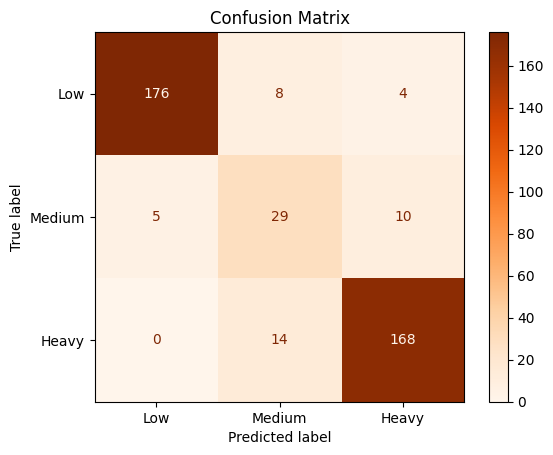

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Low', 'Medium', 'Heavy']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Confusion matrix visualization
class_names = ['Low', 'Medium', 'Heavy']
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_classes, display_labels=class_names, cmap='Oranges'
)
disp.ax_.set_title("Confusion Matrix")
plt.show()


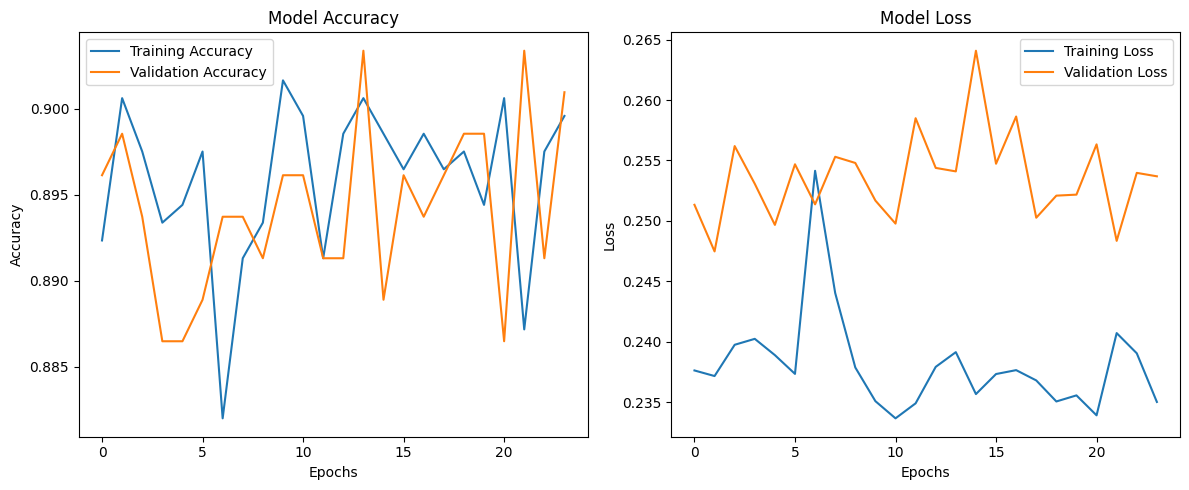

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
1# Function to predict rainfall category based on user inputs
def predict_rainfall(temp, month, year):
    # Prepare the input data
    input_data = [[temp, month, year]]
    input_scaled = scaler.transform(input_data)  # Scale using the same scaler used during training

    # Predict the rainfall category
    prediction = model.predict(input_scaled)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the class back to the category
    categories = {0: "Low Rainfall", 1: "Medium Rainfall", 2: "Heavy Rainfall"}
    return categories[predicted_class]

# Take user inputs
temp = float(input("Enter Temperature: "))
month = int(input("Enter Month (1-12): "))
year = int(input("Enter Year: "))

# Predict and display the rainfall category
predicted_category = predict_rainfall(temp, month, year)
print(f"Predicted Rainfall Category: {predicted_category}")


Enter Temperature: 46
Enter Month (1-12): 9
Enter Year: 2025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Rainfall Category: Heavy Rainfall


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
